# Predicting the Bicarbonate (parts per million) of well water using pH of well water


### Import the basic required libraries

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms

### Reading the data from excel file


In [36]:
data = pd.read_excel('slr09.xls')

*** No CODEPAGE record, no encoding_override: will use 'ascii'


### Analyze data

###  x=pH of well water, and  y=Bicarbonate (parts per million) of well water

In [37]:
data.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [38]:
data.tail()

,X,Y
29,8.5,48
30,7.8,147
31,6.7,117
32,7.1,182
33,7.3,87


In [39]:
data.shape

(34, 2)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [41]:
data.describe()

,X,Y
count,34.000000,34.000000
mean,7.661765,142.794118
std,0.501522,55.787356
min,6.700000,35.000000
25%,7.300000,107.000000
50%,7.600000,147.000000
75%,8.000000,186.500000
max,8.800000,262.000000


## Visualization of the Data

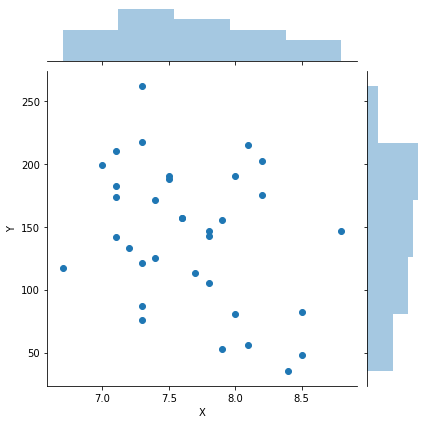

In [42]:
sns.jointplot(x='X',y='Y',data=data)

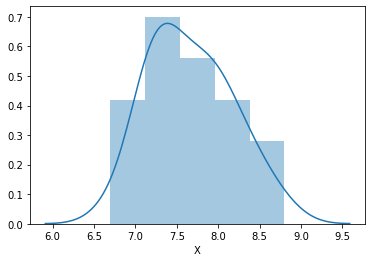

In [43]:
sns.distplot(data['X'])

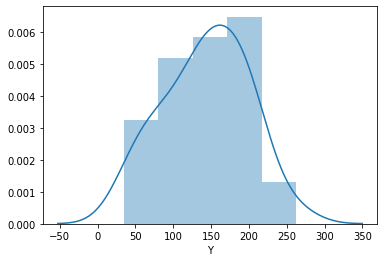

In [44]:
sns.distplot(data['Y'])

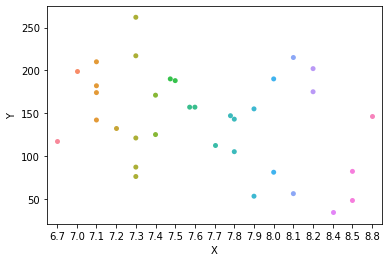

In [45]:
sns.swarmplot(x='X',y='Y',data=data)

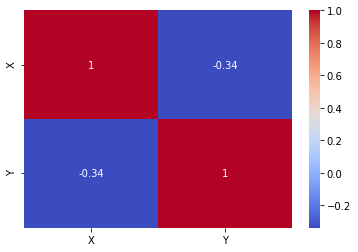

In [46]:
sns.heatmap(data.corr(),cmap="coolwarm",annot=True)

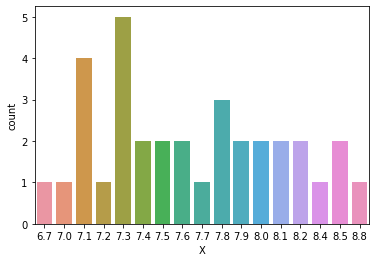

In [47]:
sns.countplot(data['X'])

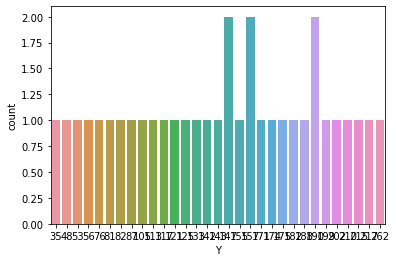

In [48]:
sns.countplot(data['Y'])

### Cleaning Data

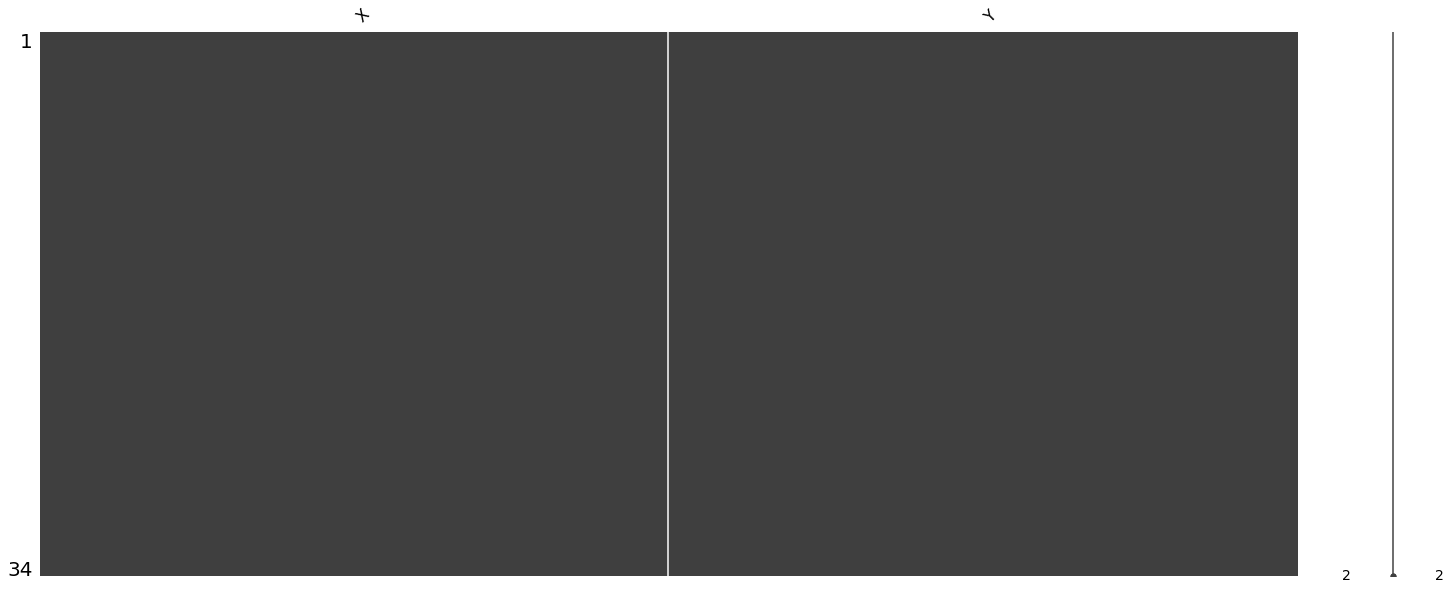

In [49]:
ms.matrix(data)

### Categorical Conversion

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       34 non-null     float64
 1   Y       34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


### Categorical conversion not required

## Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Y',axis=1),data['Y'],test_size=0.30,random_state=101)

## Training the model
 

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
linearRegression = LinearRegression()

In [55]:
linearRegression.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the model on the test set

In [56]:
Y_pred_train = linearRegression.predict(X_train)
Y_pred_test = linearRegression.predict(X_test)

In [57]:
Y_pred_train

array([138.10718563, 112.56497006, 129.59311377, 155.13532934,
       172.16347305, 167.90643713, 163.6494012 , 142.36422156,
       163.6494012 , 150.87829341,  99.79386228, 129.59311377,
       159.39236527, 172.16347305, 142.36422156, 155.13532934,
       133.8501497 , 172.16347305, 138.10718563, 163.6494012 ,
       172.16347305, 176.42050898, 189.19161677])

In [58]:
Y_pred_test

array([125.33607784, 133.8501497 , 150.87829341, 142.36422156,
       112.56497006, 116.82200599, 146.62125749, 159.39236527,
       163.6494012 , 125.33607784, 163.6494012 ])

In [59]:
LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising the Results

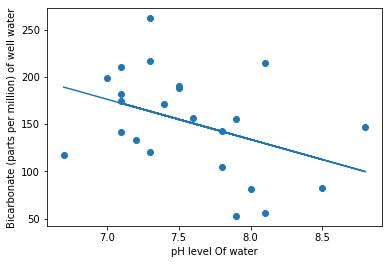

In [60]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,Y_pred_train)
plt.xlabel("pH level Of water")
plt.ylabel("Bicarbonate (parts per million) of well water")
plt.show()


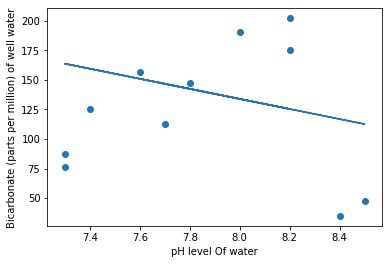

In [61]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_pred_test)
plt.xlabel("pH level Of water")
plt.ylabel("Bicarbonate (parts per million) of well water")
plt.show()

### Intercept and Coefficient

In [62]:
linearRegression.intercept_

474.41302395209567

In [63]:
linearRegression.coef_

array([-42.57035928])

### Predicting a new result

In [64]:
linearRegression.predict([[7.4]])

array([159.39236527])